# Abstract

The aim of this research is to predict the factors affecting the price of a house. The dataset has certain features that determine the popularity of a house which in turn affects its price. My aim is to figure out which of these features are most likely to attract a potential customer and based on what are the prices determined.

To achieve this, I have made use of Linear Regression where I have plotted Price as the target variable. I have tested the target variable agaisnt multiple features of the house. 
I have also used Logistic Regression to determine if a certain feature can be predicted given other variables. 

# The Data

The original dataset for House Pricing can be found on https://www.kaggle.com/greenwing1985/housepricing.

The dataset contains sixteen features, each of which are explained below -

Area - Area of the house in square feet. (A continuous value)

Garage - A multicategorical variable determining if the house has 1,2 or 3 garages.

Fireplace - A multicategorical variable determining if there are 0,1,2,3 or 4 fireplaces.

Baths - A multicategorical variable determining if there are 1,2,3,4 or 5 Bathrooms.

White Marble - A binary variable determining if the house has white marble or not.

Black Marble - A binary variable determining if the house has black marble or not.

Indian Marble - A binary variable determining if the house has indian marble or not.

Floors - A binary variable determining if the house is multifloored.

City - A multicategorical variable determining if the house is located in city 1,2 or 3.

Solar - A binary variable determining if the house has solar or not.

Electric - A binary variable determining if the house has electricity provided or not.

Fiber - A binary variable determining if the house has fiber or not.

Glass Doors - A binary variable determining if the house has glassdoors or not.

Swiming Pool - A binary variable determining if the house has swimming pool or not.

Garden - A binary variable determining if the house has garden or not.

Prices - A continuous variable showing the price of the house.

In [2307]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.formula.api as smapi
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import re
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from statsmodels.formula.api import ols
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.model_selection import train_test_split 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

## Reading the Dataset

In [2308]:
# importing the dataset.
df=pd.read_csv("HousePrices_HalfMil.csv")

In [2309]:
df.head()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400


In [2310]:
df.describe()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.00000,500000.000000,500000.00000,500000.000000,500000.000000,500000.000000
mean,124.929554,2.001290,2.003398,2.998074,0.332992,0.332690,0.334318,0.499386,2.000940,0.498694,0.50065,0.500468,0.49987,0.500436,0.501646,42050.139350
std,71.795363,0.817005,1.414021,1.414227,0.471284,0.471177,0.471752,0.500000,0.816209,0.499999,0.50000,0.500000,0.50000,0.500000,0.499998,12110.237201
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,7725.000000
25%,63.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,33500.000000
50%,125.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.00000,1.000000,0.00000,1.000000,1.000000,41850.000000
75%,187.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,50750.000000
max,249.000000,3.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,77975.000000


In [2311]:
#Checking the number of rows and columns present in the dataset.
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 500000 rows and 16 columns


## Performing EDA to check for any null values 

In [2312]:
#Checks if any null value is present in the dataset.
df.isnull().values.any()

False

In [2313]:
df.isnull().sum()

Area             0
Garage           0
FirePlace        0
Baths            0
White Marble     0
Black Marble     0
Indian Marble    0
Floors           0
City             0
Solar            0
Electric         0
Fiber            0
Glass Doors      0
Swiming Pool     0
Garden           0
Prices           0
dtype: int64

In [2314]:
np.random.seed(sum(map(ord, "distributions")))

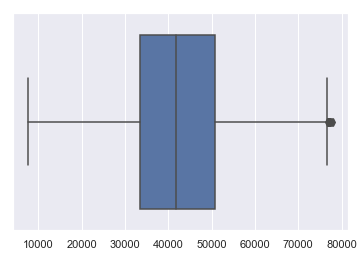

In [2315]:
#Plotting a boxplot for Prices to check where the maximum concentration of prices lie. 
#This gives us an idea about the median house prices.
sns.boxplot(np.array(df['Prices']))

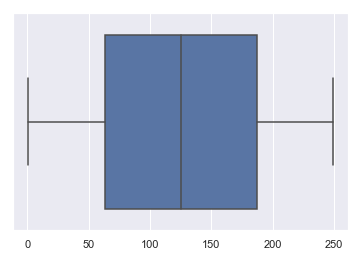

In [2316]:
#Plotting a boxplot to check where the median of Area lies.
sns.boxplot(np.array(df['Area']))

## Since 'Prices' is set as target variable, I am plotting a heatmap to check which features have the highest correlation with Prices. 

As we can see from the heatmap, Floors, Fiber and White Marble have a high correlation with Prices

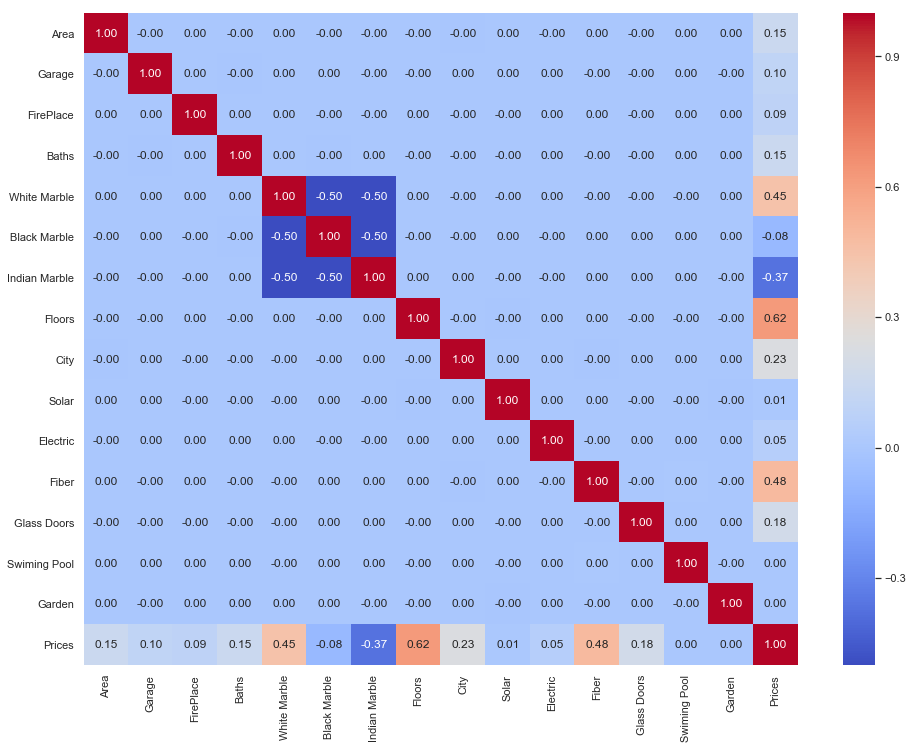

In [2317]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [2318]:
# choose attributes which shows relation
xValues = df[['White Marble','Indian Marble','Prices','Floors','City','Fiber']]
yValues = df[['Black Marble', 'Area','Prices','Baths','Glass Doors']]

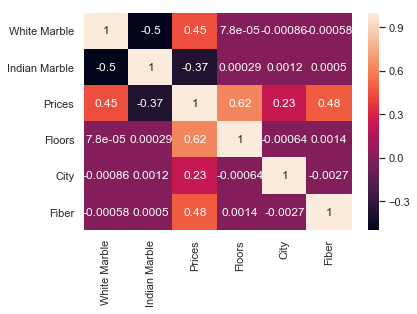

In [2319]:
# show corr of the same
sns.heatmap(xValues.corr(), annot=True)

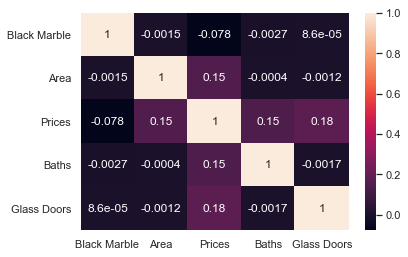

In [2320]:
#Choosing attributes that showed low correlation with prices.
sns.heatmap(yValues.corr(), annot=True)

In [2321]:
#The number of rows and columns in the dataset.
df.shape

(500000, 16)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


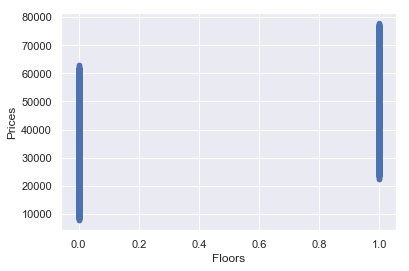

In [2322]:
#Plotting a scatter plot to check the price range for houses that have either 0-single floored or 1-multifloored.
#As we can see, the houses with multifloors lie in the higher end of Prices.
df.plot(kind='scatter', x='Floors',y='Prices')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


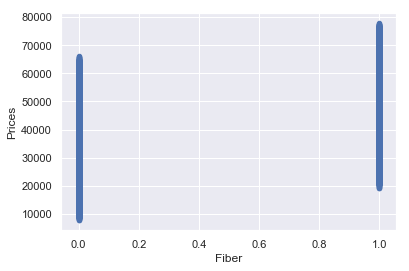

In [2323]:
#Plotting a scatter plot to check the price range for houses that have either have or dont have Fiber
#As we can see, the houses with Fiber lie in the higher end of Prices.
df.plot(kind='scatter', x='Fiber',y='Prices')

From the below scatter plot, we can observe that the number of fireplaces almost does not affect the price of the house as they almost lie within the same range.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


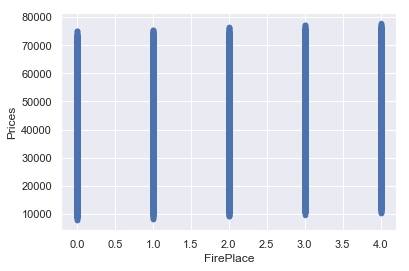

In [2324]:
df.plot(kind='scatter', x='FirePlace',y='Prices')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


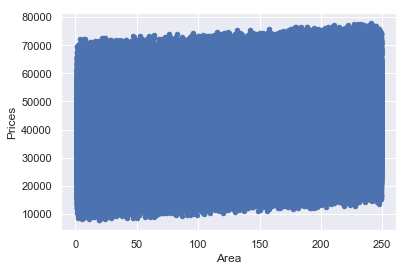

In [2325]:
df.plot(kind='scatter', x='Area',y='Prices')

In [2326]:
#Renaming the columns.
df.rename(columns={'White Marble': 'WhiteMarble', 'Black Marble': 'BlackMarble','Indian Marble':'IndianMarble','Glass Doors':'GlassDoor','Swiming Pool':'SwimmingPool'}, inplace=True)

## In supervised learning, we feed the algorithm a dataset in which the right answers are given, we then test it to check if it can predict more right answers for any future data that is fed into it. This is called a Regression Problem.
## We are going to use two supervised regression models - Linear and Logistic to study these data trends in detail

Setting up the features which we are using to predict the price of the model. 

In [2327]:
x = df[['Area','Garage','FirePlace','Baths','WhiteMarble','BlackMarble','IndianMarble','Floors','City','Solar','Electric','Fiber','GlassDoor','SwimmingPool','Garden']]
target = df[['Prices']]

Dividing the dataset into two parts.
The training set is used to feed the data to the algorithm, and picking these values the algorithm learns the data trends. We hope for the algorithm to predict the output accurately for any data that we feed into it after training it.
To test if the algorithm is reading the data right, we have a test set.
The test set is not shown to the algorithm. We check the accuracy of the test set to see how well the data was interpreted by our algorithm. 

In [2328]:
#Diving the dataset into training and testing sets.
#70% of the dataset is used for training the algorithm, 20% is used for testing.
x_train, x_test , target_train, target_test = train_test_split(x,target,train_size = 0.7)

In [2329]:
#Checking the number of rows and columns used for training. 
x_train.shape

(350000, 15)

In [2330]:
x_test.shape

(150000, 15)

In [2331]:
#Checking the number of rows and columns used for training the target. 
target_train.shape

(350000, 1)

In [2332]:
target_test.shape

(150000, 1)

In [2333]:
#Using a simple linear regression model
linear_model = LinearRegression()
linear_model.fit(x,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [2334]:
#Predicting the output.
predict_y = linear_model.predict(x_test)

In [2335]:
print (predict_y)

[[35400.]
 [32775.]
 [54400.]
 ...
 [52750.]
 [45100.]
 [24475.]]


In [2336]:
x_test

,Area,Garage,FirePlace,Baths,WhiteMarble,BlackMarble,IndianMarble,Floors,City,Solar,Electric,Fiber,GlassDoor,SwimmingPool,Garden
112499,176,3,3,5,0,1,0,0,3,1,1,0,0,0,1
288065,121,2,3,1,1,0,0,0,2,0,1,0,0,0,0
240721,168,2,2,1,0,1,0,1,2,1,0,1,1,1,0
124101,205,1,2,5,0,1,0,1,3,0,0,1,1,1,0
249394,237,1,4,3,0,1,0,1,1,1,0,1,1,0,0
244483,1,2,1,4,0,1,0,0,2,1,1,0,1,0,0
340730,81,2,3,4,1,0,0,1,3,1,0,0,1,1,0
392330,96,3,0,5,1,0,0,0,3,1,0,0,0,0,1
40720,101,2,2,2,0,1,0,1,2,1,1,1,1,1,0
243843,69,1,0,1,0,0,1,0,2,0,1,1,0,1,1


In [2337]:
#When cross-verified, I found these answers to be accurate with the dataset.
target_test

,Prices
112499,35400
288065,32775
240721,54400
124101,62075
249394,55125
244483,27725
340730,57475
392330,38900
40720,55225
243843,25475


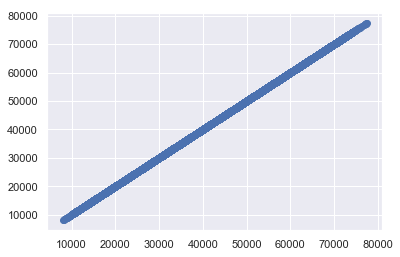

In [2338]:
plt.scatter(predict_y,target_test)

In [2339]:
#Checking the Regression results to determine the confidence level interval, AIC, BIC and Adjusted R squared values.
linearModel = smapi.ols(formula="target~Area+Garage+FirePlace+Baths+WhiteMarble+BlackMarble+IndianMarble+Floors+City+Solar+Electric+Fiber+GlassDoor+SwimmingPool+Garden",data = df).fit()
predictions = linearModel.predict(x)
linearModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.059e+32
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:38:20   Log-Likelihood:             1.0570e+07
No. Observations:              500000   AIC:                        -2.114e+07
Df Residuals:                  499985   BIC:                        -2.114e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5500.0000    9.2e-13   5.98e+15      0.000    5500.000    5500.000
Area            25.0000   3.14e-15   7.96e+15      0.000      25.000      25.000
Garage        1500.0000   2.76e-13   5.43e+15      0.000    1500.000    1500.000
FirePlace      750.0000    1.6e-13    4.7e+15      0.000     750.000     750.000
Baths         1250.0000    1.6e-13   7.84e+15      0.000    1250.000    1250.000
WhiteMarble   9500.0000   4.43e-13   2.14e+16      0.000    9500.000    9500.000
BlackMarble    500.0000   4.43e-13   1.13e+15      0.000     500.000     500.000
IndianMarble -4500.0000   4.42e-13  -1.02e+16      0.000   -4500.000   -4500.000
Floors          1.5e+04   4.51e-13   3.32e+16      0.000     1.5e+04     1.5e+04
City          3500.0000   2.76e-13   1.27e+16      0.000    3500.000    3500.000
Solar          250.0000   4.51e-13   5.54e+14      0.000     250.000     250.000
Electric      1250.0000   4.51e-13   2.77e+15      0.000    1250.000    1250.000
Fiber         1.175e+04   4.51e-13    2.6e+16      0.000    1.18e+04    1.18e+04
GlassDoor     4450.0000   4.51e-13   9.86e+15      0.000    4450.000    4450.000
SwimmingPool  4.974e-14   4.51e-13      0.110      0.912   -8.35e-13    9.34e-13
Garden        5.166e-12   4.51e-13     11.450      0.000    4.28e-12    6.05e-12
==============================================================================
Omnibus:                   123629.996   Durbin-Watson:                   0.474
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21390.415
Skew:                          -0.001   Prob(JB):                         0.00
Kurtosis:                       1.987   Cond. No.                     8.55e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.42e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [2340]:
print((linear_model.score(x_test,target_test))*100)

100.0


As we can see above, our model is a perfect fit.
We are getting a perfect Adjusted R squared value of 1.000, The AIC and BIC values are complying and are low.
We are also getting a 100% accuracy score for this model.

From the P>|t| values for each feature, we can see that all of them are highly significant to this model. The probability of any outcome being accurate is high enough. 
We can notice that the Swimming pool values are not that significant to the model with such high P value.

For now, we will choose this as our best fit model.

## Linear Model 2

In [2341]:
#Taking the attributes that showed the highest correlation with Prices -
x2 = df[['WhiteMarble','IndianMarble','Floors','City','Fiber']]
target2 = df[['Prices']]

In [2342]:
x2_train, x2_test , target2_train, target2_test = train_test_split(x2,target2,train_size = 0.4)

In [2343]:
x2_train.shape

(200000, 5)

In [2344]:
x2_test.shape

(300000, 5)

In [2345]:
target2_train.shape

(200000, 1)

In [2346]:
target2_test.shape

(300000, 1)

In [2347]:
linear_model2 = LinearRegression()
linear_model2.fit(x2,target2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [2348]:
predict_y2 = linear_model2.predict(x2_test)

In [2349]:
print (predict_y2)

[[54082.35561989]
 [35596.50826997]
 [49085.8104454 ]
 ...
 [32879.13069047]
 [49085.8104454 ]
 [32879.13069047]]


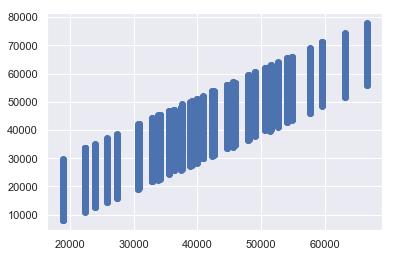

In [2350]:
plt.scatter(predict_y2,target2_test)

In [2351]:
linearModel2 = smapi.ols(formula="target2~WhiteMarble+IndianMarble+Floors+City+Fiber",data = df).fit()
predictions = linearModel2.predict(x2)
linearModel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                target2   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 9.265e+05
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:38:25   Log-Likelihood:            -4.8282e+06
No. Observations:              500000   AIC:                         9.656e+06
Df Residuals:                  499994   BIC:                         9.656e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.036e+04     17.749   1147.202      0.000    2.03e+04    2.04e+04
WhiteMarble   9022.6577     13.103    688.584      0.000    8996.976    9048.340
IndianMarble -4996.5452     13.090   -381.701      0.000   -5022.202   -4970.889
Floors        1.499e+04     10.691   1402.287      0.000     1.5e+04     1.5e+04
City          3494.2263      6.549    533.542      0.000    3481.390    3507.062
Fiber         1.174e+04     10.691   1098.137      0.000    1.17e+04    1.18e+04
==============================================================================
Omnibus:                     4768.605   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3061.076
Skew:                           0.001   Prob(JB):                         0.00
Kurtosis:                       2.617   Cond. No.                         9.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2352]:
print((linear_model2.score(x2_test,target2_test))*100)

90.28777156424567


Taking all the features that showed high correlation with Prices, we can observe that they give us a near perfect adjusted R square value and the AIC and BIC values are complying too. 

We get an accuracy score of 90% with this model. 

We can also observe that all the features selected are highly significant to this model.

## MultiCollinearity

## Multicollinearity is an issue that occurs when two independent variables are in some way acting as determing factors to each other. We will check if this issue occurs in our model above.

In [2353]:
rsquare = linear_model2.score(x2,target2)

In [2354]:
rsquare

0.9025858757044811

In [2355]:
#Checking if the value crosses a threshold of 4.
1/(1-rsquare)

10.265451824689869

In [2356]:
#Since our 1/(1-rsquare) value is around 10, there is an investigation required to check if there is
#multicollinearity amongst the indepedent variable
pd.Series([variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])], index=x2.columns)

WhiteMarble     1.727654
IndianMarble    1.732178
Floors          1.816946
City            3.179936
Fiber           1.818022
dtype: float64

In [2357]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]
vif["features"] = x2.columns
vif.round(1)

,VIF Factor,features
0,1.7,WhiteMarble
1,1.7,IndianMarble
2,1.8,Floors
3,3.2,City
4,1.8,Fiber


## From the above output, we can see that the Variance Inflation Factor (VIF) amongst these attributes is below the threshold of 4 and this implies that there is no multicollinearity amongst these independent features.

## Linear Model 3

In [2358]:
#Taking the attributes that showed the least correlation with Prices -
x3 = df[['BlackMarble', 'Baths','GlassDoor']]
target3 = df['Prices']

Dividing the training and testing set into 60-40

In [2359]:
x3_train, x3_test , target3_train, target3_test = train_test_split(x3,target3,train_size = 0.6)

In [2360]:
linear_model3 = LinearRegression()
linear_model3.fit(x3,target3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [2361]:
predict_y3 = linear_model3.predict(x3_test)
print(predict_y3)

[36027.90032478 39757.44451633 43680.79726805 ... 39757.44451633
 38024.11442057 42996.84000931]


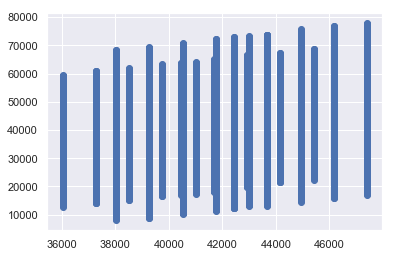

In [2362]:
plt.scatter(predict_y3,target3_test)

In [2363]:
linearModel3 = smapi.ols(formula="target3~BlackMarble+Baths+GlassDoor",data = df).fit()
predictions = linearModel3.predict(x3)
linearModel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                target3   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                 1.069e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:38:30   Log-Likelihood:            -5.3948e+06
No. Observations:              500000   AIC:                         1.079e+07
Df Residuals:                  499996   BIC:                         1.079e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.678e+04     43.949    836.908      0.000    3.67e+04    3.69e+04
BlackMarble -1996.2141     35.236    -56.653      0.000   -2065.275   -1927.153
Baths        1243.1814     11.740    105.897      0.000    1220.172    1266.191
GlassDoor    4413.5015     33.205    132.919      0.000    4348.422    4478.581
==============================================================================
Omnibus:                    12411.406   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6256.624
Skew:                          -0.001   Prob(JB):                         0.00
Kurtosis:                       2.452   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2364]:
accuracy = linear_model3.score(x3_test,target3_test)
print(accuracy*100)

6.029915711309252


Here, we chose the the features that had least correlation with Prices. 

From the above result, we can see that the Adjusted R square value is very low and the accuracy of this model also stands at a low 6.15% 

## Checking for Multicollinearity amongst these features

In [2365]:
rsquare = linear_model3.score(x3,target3)
rsquare

0.060284886657565935

In [2366]:
1/(1-rsquare)

1.0641523008426896

As seen above, the value is very low and there is very less chance of any multicollinearity to occur

In [2367]:
pd.Series([variance_inflation_factor(x3.values, i) for i in range(x3.shape[1])], index=x3.columns)

BlackMarble    1.390210
Baths          1.958510
GlassDoor      1.712306
dtype: float64

# Interaction Effect 

An interaction effect is the simultaneous effect of two or more independent variables on one dependent variable. 

As noticed in the above model, the bath feature did not have much effect on the Price. Let us combine Bath with Area to see if there is any sgnificant improvement in the model.

In [1]:
#Making a new dataframe
df2 = df.copy()

NameError: name 'df' is not defined

In [2369]:
df2['Area_Bath'] = df2['Area']*df2['Baths']
x3_1 = df2[['BlackMarble', 'Area_Bath','GlassDoor','Area','Baths']]

In [2370]:
linearModel3_1 = smapi.ols(formula="target3~BlackMarble+Area_Bath+GlassDoor",data = df2).fit()
predictions = linearModel3_1.predict(x3_1)
linearModel3_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                target3   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                 1.385e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:38:31   Log-Likelihood:            -5.3904e+06
No. Observations:              500000   AIC:                         1.078e+07
Df Residuals:                  499996   BIC:                         1.078e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.754e+04     33.344   1125.868      0.000    3.75e+04    3.76e+04
BlackMarble -1990.2442     34.926    -56.984      0.000   -2058.699   -1921.789
Area_Bath       7.9135      0.056    142.525      0.000       7.805       8.022
GlassDoor    4417.0114     32.913    134.203      0.000    4352.503    4481.520
==============================================================================
Omnibus:                    13712.618   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6701.702
Skew:                          -0.000   Prob(JB):                         0.00
Kurtosis:                       2.433   Cond. No.                     1.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can see, the interaction did not have a significant effect on the model. There was a very small, almost negligible improvement in the Adjusted R Squared value and an almost negligible drop in AIC and BIC values.

This shows that our assumptions did not give the expected result.

## Linear Model 4

In [2371]:
#A single variate linear regression -
x4 = df[['Floors']]
target4 = df[['Prices']]

In [2372]:
x4_train, x4_test , target4_train, target4_test = train_test_split(x4,target4,train_size = 0.6)

In [2373]:
linear_model4 = LinearRegression()
linear_model4.fit(x4,target4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [2374]:
predict_y4 = linear_model4.predict(x4_test)
print(predict_y4)

[[49561.04626481]
 [34557.6565977 ]
 [34557.6565977 ]
 ...
 [49561.04626481]
 [34557.6565977 ]
 [34557.6565977 ]]


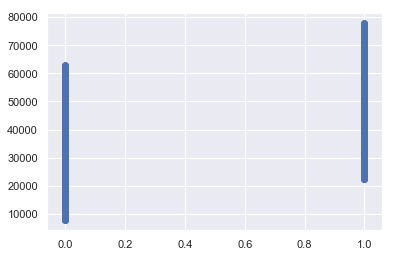

In [2375]:
plt.scatter(x4_test,target4_test)

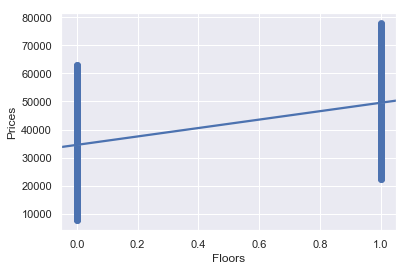

In [2376]:
#Linear regression plot that shows the range of Price. As we can see, most of the single floored house lie within 
#Price range of about 35000 and the multifloored houses lie in the range of 50000.
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x="Floors", y="Prices", data=df)

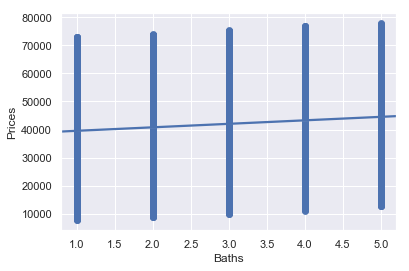

In [2377]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x="Baths", y="Prices", data=df)

In [2378]:
linearModel4 = smapi.ols(formula="target4~x4",data = df).fit()
predictions = linearModel4.predict(x4)
linearModel4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                target4   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                 3.113e+05
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:40:42   Log-Likelihood:            -5.2894e+06
No. Observations:              500000   AIC:                         1.058e+07
Df Residuals:                  499998   BIC:                         1.058e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.456e+04     19.002   1818.605      0.000    3.45e+04    3.46e+04
x4            1.5e+04     26.890    557.958      0.000     1.5e+04    1.51e+04
==============================================================================
Omnibus:                    11394.338   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6184.456
Skew:                           0.074   Prob(JB):                         0.00
Kurtosis:                       2.476   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2379]:
print(linear_model4.score(x4_test,target4_test)*100)

38.53447512481198


## Linear Model 5

In [2380]:
x5 = df[['BlackMarble']]
target5 = df['Prices']

In [2381]:
x5_train, x5_test , target5_train, target5_test = train_test_split(x5,target5,train_size = 0.6)

In [2382]:
linear_model5 = LinearRegression()
linear_model5.fit(x5,target5)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [2383]:
predict_y5 = linear_model5.predict(x5_test)
print(predict_y5)

[42717.52626216 42717.52626216 42717.52626216 ... 40711.49388319
 42717.52626216 42717.52626216]


In [2384]:
linearModel5 = smapi.ols(formula="target5~x5",data = df).fit()
predictions = linearModel5.predict(x5)
linearModel5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                target5   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3065.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:40:42   Log-Likelihood:            -5.4088e+06
No. Observations:              500000   AIC:                         1.082e+07
Df Residuals:                  499998   BIC:                         1.082e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.272e+04     20.901   2043.754      0.000    4.27e+04    4.28e+04
x5         -2006.0324     36.237    -55.358      0.000   -2077.057   -1935.008
==============================================================================
Omnibus:                     9239.095   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5069.889
Skew:                          -0.000   Prob(JB):                         0.00
Kurtosis:                       2.507   Cond. No.                         2.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2385]:
print(linear_model5.score(x5_test,target5_test)*100)

0.5667478088322797


# Linear Model 6

In [2386]:
x6 = df[['Fiber']]
target6 = df[['Prices']]

In [2387]:
x6_train, x6_test , target6_train, target6_test = train_test_split(x6,target6,train_size = 0.6)

In [2388]:
linear_model6 = LinearRegression()
linear_model6.fit(x6,target6)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [2389]:
predict_y6 = linear_model6.predict(x6_test)
print(predict_y6)

[[36175.71767174]
 [47913.57439437]
 [36175.71767174]
 ...
 [47913.57439437]
 [36175.71767174]
 [36175.71767174]]


In [2390]:
linearModel6 = smapi.ols(formula="target6~x6",data = df).fit()
predictions = linearModel6.predict(x6)
linearModel6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                target6   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                 1.535e+05
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:40:42   Log-Likelihood:            -5.3434e+06
No. Observations:              500000   AIC:                         1.069e+07
Df Residuals:                  499998   BIC:                         1.069e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.618e+04     21.196   1706.714      0.000    3.61e+04    3.62e+04
x6          1.174e+04     29.962    391.761      0.000    1.17e+04    1.18e+04
==============================================================================
Omnibus:                    21220.357   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9101.859
Skew:                           0.054   Prob(JB):                         0.00
Kurtosis:                       2.348   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2391]:
print(linear_model6.score(x6_test,target6_test)*100)

23.3470180086222


# Linear Model 7

In [2392]:
x7 = df[['Baths']]
target7 = df[['Prices']]

In [2393]:
x7_train, x7_test , target7_train, target7_test = train_test_split(x7,target7,train_size = 0.6)

In [2394]:
linear_model7 = LinearRegression()
linear_model7.fit(x7,target7)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [2395]:
predict_y7 = linear_model7.predict(x7_test)
print(predict_y7)

[[40810.1313312 ]
 [44537.33397991]
 [44537.33397991]
 ...
 [42052.5322141 ]
 [40810.1313312 ]
 [43294.93309701]]


In [2396]:
linearModel7 = smapi.ols(formula="target7~x7",data = df).fit()
predictions = linearModel7.predict(x7)
linearModel7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                target7   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                 1.075e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:40:43   Log-Likelihood:            -5.4051e+06
No. Observations:              500000   AIC:                         1.081e+07
Df Residuals:                  499998   BIC:                         1.081e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.833e+04     39.719    964.911      0.000    3.82e+04    3.84e+04
x7          1242.4009     11.982    103.689      0.000    1218.917    1265.885
==============================================================================
Omnibus:                    10355.598   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5574.555
Skew:                           0.037   Prob(JB):                         0.00
Kurtosis:                       2.488   Cond. No.                         8.36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2397]:
print(linear_model7.score(x7_test,target7_test)*100)

2.0807098224568614


# Logistic Regression

## Logistic Regression is basically a "Classification Task". 

We are trying to predict a discrete value output.
In this logistic Model, I am trying to predict if, given all the features, we can determine if the house is single or multi-floored


## Logistic Model 1

In [2398]:
logisticX = df[['Area','Garage','FirePlace','Baths','WhiteMarble','BlackMarble','IndianMarble','Prices','City','Solar','Electric','Fiber','GlassDoor','SwimmingPool','Garden']]
logisticY = df[['Floors']]

In [2399]:
#Dividing the data into test and training sets. The training set has a size of 75%
logisticX_train,logisticX_test,logisticY_train,logisticY_test=train_test_split(logisticX,logisticY,test_size=0.25,random_state=0)

In [2400]:
logistic_Regression = LogisticRegression()

In [2401]:
logistic_Regression.fit(logisticX_train,logisticY_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [2402]:
y_pred = logistic_Regression.predict(logisticX_test)

In [2403]:
print(y_pred)

[0 0 1 ... 0 1 1]


A Confusion Matrix is also known as an "Error Matrix". It helps us visualize the performance of the algorithm.

A confusion Matrix is typically used in a Supervised Learning Algorithm.

In [2404]:
confusion_Matrix = metrics.confusion_matrix(logisticY_test, y_pred)

In a confusion matrix, the values on the diagonals are the accurately predicted values.

In [2405]:
confusion_Matrix

array([[62474,    61],
       [    6, 62459]], dtype=int64)

## Calculate the probability of getting the dependent variable

(62474+62459)/(62474+62459+61+6) =

0.999464

In [2406]:
print("Accuracy:",(metrics.accuracy_score(logisticY_test, y_pred)*100))
print("Precision:",(metrics.precision_score(logisticY_test, y_pred)*100))
print("Recall:",(metrics.recall_score(logisticY_test, y_pred)*100))

Accuracy: 99.9464
Precision: 99.90243122200896
Recall: 99.99039462098776


As we can see, this model gives us close to 100% Accuracy, Precision and Recall.

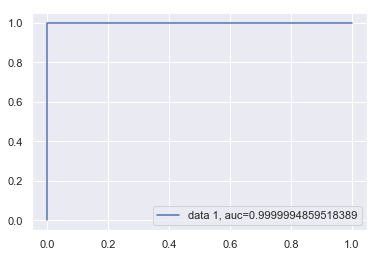

In [2407]:
#Plotting an ROC curve
y_pred_probability = logistic_Regression.predict_proba(logisticX_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(logisticY_test,  y_pred_probability)
auc = metrics.roc_auc_score(logisticY_test, y_pred_probability)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

The accuracy shown in the curve is 99.99%

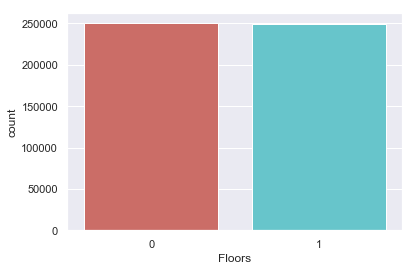

In [2408]:
#Plotting a graph to cross-check if out target variable was discrete
sns.countplot(x='Floors',data=df, palette='hls')
plt.show()

As we can see below, the Adjusted R Squared value is a perfect 1.000 and the AIC and BIC values are complying and are low.

We can also observe that the features are highly significant to the model.
Although, Garden can be eliminated from the predicting features.


In [2409]:
logModel = smapi.ols(formula="logisticY~logisticX",data = df).fit()
predictions = logModel.predict(logisticX)
logModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logisticY   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.943e+30
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:40:51   Log-Likelihood:             1.4452e+07
No. Observations:              500000   AIC:                        -2.890e+07
Df Residuals:                  499985   BIC:                        -2.890e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.3667    4.1e-16  -8.94e+14      0.000      -0.367      -0.367
logisticX[0]     -0.0017   1.37e-18  -1.21e+15      0.000      -0.002      -0.002
logisticX[1]     -0.1000   1.19e-16  -8.41e+14      0.000      -0.100      -0.100
logisticX[2]     -0.0500   6.85e-17   -7.3e+14      0.000      -0.050      -0.050
logisticX[3]     -0.0833   6.96e-17   -1.2e+15      0.000      -0.083      -0.083
logisticX[4]     -0.6333   2.37e-16  -2.68e+15      0.000      -0.633      -0.633
logisticX[5]     -0.0333   1.89e-16  -1.76e+14      0.000      -0.033      -0.033
logisticX[6]      0.3000   1.89e-16   1.58e+15      0.000       0.300       0.300
logisticX[7]   6.667e-05   1.28e-20   5.22e+15      0.000    6.67e-05    6.67e-05
logisticX[8]     -0.2333   1.26e-16  -1.86e+15      0.000      -0.233      -0.233
logisticX[9]     -0.0167   1.92e-16  -8.69e+13      0.000      -0.017      -0.017
logisticX[10]    -0.0833   1.92e-16  -4.33e+14      0.000      -0.083      -0.083
logisticX[11]    -0.7833   2.44e-16  -3.21e+15      0.000      -0.783      -0.783
logisticX[12]    -0.2967      2e-16  -1.48e+15      0.000      -0.297      -0.297
logisticX[13] -2.233e-16   1.92e-16     -1.165      0.244   -5.99e-16    1.52e-16
logisticX[14] -9.216e-17   1.92e-16     -0.481      0.631   -4.68e-16    2.84e-16
==============================================================================
Omnibus:                     5305.178   Durbin-Watson:                   0.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3343.229
Skew:                          -0.018   Prob(JB):                         0.00
Kurtosis:                       2.601   Cond. No.                     2.32e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.78e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [2410]:
X = df[['Area','Garage','FirePlace','BlackMarble','IndianMarble','Prices','City','Fiber','Garden']]
Y = df[['Floors']]

In [2411]:
logisticm=sm.Logit(Y,X)

In [2412]:
result=logisticm.fit()

Optimization terminated successfully.
         Current function value: 0.316328
         Iterations 7


In [2413]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                 Floors   No. Observations:               500000
Model:                          Logit   Df Residuals:                   499991
Method:                           MLE   Df Model:                            8
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                  0.5436
Time:                        23:40:54   Log-Likelihood:            -1.5816e+05
converged:                       True   LL-Null:                   -3.4657e+05
                                        LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Area            -0.0182   7.68e-05   -237.226      0.000      -0.018      -0.018
Garage          -1.7349      0.007   -257.812      0.000      -1.748      -1.722
FirePlace       -0.6621      0.004   -187.06

## Logistic Model 2

Using a multicategorical output

In [2414]:
logisticX = df[['Area','Prices','City','Fiber','GlassDoor','Garden']]
logisticY = df[['Baths']]

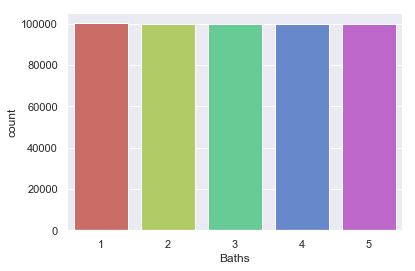

In [2415]:
sns.countplot(x='Baths',data=df, palette='hls')
plt.show()

In [2416]:
logisticX_train,logisticX_test,logisticY_train,logisticY_test=train_test_split(logisticX,logisticY,test_size=0.25,random_state=0)

In [2417]:
logistic_Regression = LogisticRegression()

In [2418]:
logistic_Regression.fit(logisticX_train,logisticY_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [2419]:
y_pred = logistic_Regression.predict(logisticX_test)
print(y_pred)

[1 1 5 ... 1 5 5]


In [2420]:
confusion_Matrix = metrics.confusion_matrix(logisticY_test, y_pred)

In [2421]:
confusion_Matrix

array([[ 9173,     0,     0,   653, 15232],
       [ 8579,     0,     0,   715, 15631],
       [ 8209,     0,     0,   687, 16300],
       [ 7685,     0,     0,   734, 16663],
       [ 7150,     0,     0,   680, 16909]], dtype=int64)

## Calculate the probability of getting the dependent variable

(9173+734+16909)/(9173+653+15232+8579+715+15631+8209+687+16300+7685+734+16663+7150+680+16909) =

0.214528

In [2422]:
print("Accuracy:",(metrics.accuracy_score(logisticY_test, y_pred)*100))

Accuracy: 21.4528


In [2423]:
print(classification_report(logisticY_test, y_pred))

              precision    recall  f1-score   support

           1       0.22      0.37      0.28     25058
           2       0.00      0.00      0.00     24925
           3       0.00      0.00      0.00     25196
           4       0.21      0.03      0.05     25082
           5       0.21      0.68      0.32     24739

   micro avg       0.21      0.21      0.21    125000
   macro avg       0.13      0.22      0.13    125000
weighted avg       0.13      0.21      0.13    125000



## Logistic Model 3

Checking how the Prices of a house determines whether the house has white marble or not

In [2424]:
logisticX = df[['Prices']]
logisticY = df[['WhiteMarble']]

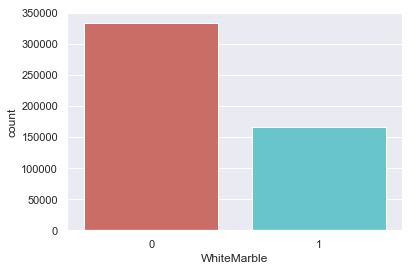

In [2425]:
sns.countplot(x='WhiteMarble',data=df, palette='hls')
plt.show()

In [2426]:
logisticX_train,logisticX_test,logisticY_train,logisticY_test=train_test_split(logisticX,logisticY,test_size=0.25,random_state=0)

In [2427]:
logistic_Regression = LogisticRegression()

In [2428]:
logistic_Regression.fit(logisticX_train,logisticY_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [2429]:
y_pred = logistic_Regression.predict(logisticX_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [2430]:
confusion_Matrix = metrics.confusion_matrix(logisticY_test, y_pred)

In [2431]:
confusion_Matrix

array([[83377,     0],
       [41623,     0]], dtype=int64)

## Calculate the probability of getting the dependent variable

(83377)/(83377+41623) =

0.667016

In [2432]:
print("Accuracy:",(metrics.accuracy_score(logisticY_test, y_pred)*100))
print("Precision:",(metrics.precision_score(logisticY_test, y_pred)*100))
print("Recall:",(metrics.recall_score(logisticY_test, y_pred)*100))

Accuracy: 66.7016
Precision: 0.0
Recall: 0.0


In [2433]:
print(classification_report(logisticY_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80     83377
           1       0.00      0.00      0.00     41623

   micro avg       0.67      0.67      0.67    125000
   macro avg       0.33      0.50      0.40    125000
weighted avg       0.44      0.67      0.53    125000



In [2434]:
logModel = smapi.ols(formula="logisticY~logisticX",data = df).fit()
predictions = logModel.predict(logisticX)
logModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logisticY   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                 1.257e+05
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:41:00   Log-Likelihood:            -2.7727e+05
No. Observations:              500000   AIC:                         5.545e+05
Df Residuals:                  499998   BIC:                         5.546e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4004      0.002   -185.970      0.000      -0.405      -0.396
logisticX   1.744e-05   4.92e-08    354.483      0.000    1.73e-05    1.75e-05
==============================================================================
Omnibus:                   134096.545   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41003.878
Skew:                           0.491   Prob(JB):                         0.00
Kurtosis:                       1.998   Cond. No.                     1.58e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

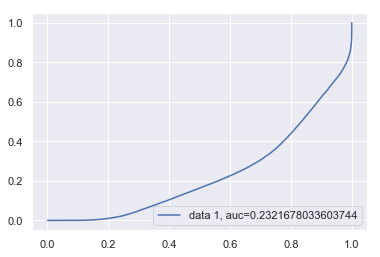

In [2435]:
y_pred_probability = logistic_Regression.predict_proba(logisticX_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(logisticY_test,  y_pred_probability)
auc = metrics.roc_auc_score(logisticY_test, y_pred_probability)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Logistic Model 4

In [2436]:
logisticX = df[['Prices','Area','Garage','FirePlace','Floors','City','Fiber']]
logisticY = df[['WhiteMarble']]

In [2437]:
logisticX_train,logisticX_test,logisticY_train,logisticY_test=train_test_split(logisticX,logisticY,test_size=0.25,random_state=0)

In [2438]:
logistic_Regression = LogisticRegression()

In [2439]:
logistic_Regression.fit(logisticX_train,logisticY_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [2440]:
y_pred = logistic_Regression.predict(logisticX_test)
print(y_pred)

[0 0 0 ... 0 0 1]


In [2441]:
confusion_Matrix = metrics.confusion_matrix(logisticY_test, y_pred)

In [2442]:
confusion_Matrix

array([[79995,  3382],
       [ 3622, 38001]], dtype=int64)

## Calculate the probability of getting the dependent variable

(79995+38001)/(79995+38001+3382+3622) =

0.943968

In [2443]:
print("Accuracy:",(metrics.accuracy_score(logisticY_test, y_pred)*100))
print("Precision:",(metrics.precision_score(logisticY_test, y_pred)*100))
print("Recall:",(metrics.recall_score(logisticY_test, y_pred)*100))

Accuracy: 94.3968
Precision: 91.82756204238456
Recall: 91.29808038824689


In [2444]:
print(classification_report(logisticY_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     83377
           1       0.92      0.91      0.92     41623

   micro avg       0.94      0.94      0.94    125000
   macro avg       0.94      0.94      0.94    125000
weighted avg       0.94      0.94      0.94    125000



In [2445]:
logModel = smapi.ols(formula="logisticY~logisticX",data = df).fit()
predictions = logModel.predict(logisticX)
logModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logisticY   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                 1.665e+05
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:41:04   Log-Likelihood:                -32456.
No. Observations:              500000   AIC:                         6.493e+04
Df Residuals:                  499992   BIC:                         6.502e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.5235      0.002   -288.016      0.000      -0.527      -0.520
logisticX[0]  6.078e-05   5.63e-08   1079.716      0.000    6.07e-05    6.09e-05
logisticX[1]    -0.0015   5.28e-06   -286.260      0.000      -0.002      -0.002
logisticX[2]    -0.0907      0.000   -199.338      0.000      -0.092      -0.090
logisticX[3]    -0.0455      0.000   -173.847      0.000      -0.046      -0.045
logisticX[4]    -0.9114      0.001   -816.492      0.000      -0.914      -0.909
logisticX[5]    -0.2128      0.000   -435.470      0.000      -0.214      -0.212
logisticX[6]    -0.7135      0.001   -724.698      0.000      -0.715      -0.712
==============================================================================
Omnibus:                    18760.022   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9659.084
Skew:                          -0.154   Prob(JB):                         0.00
Kurtosis:                       2.393   Cond. No.                     2.23e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can see, the above model seems to have high multicollinearity problem.

Let us check the VIF for this model

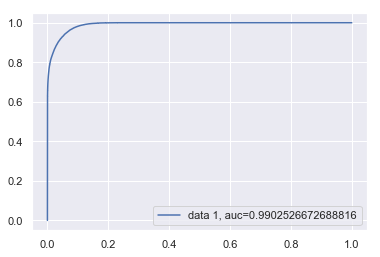

In [2446]:
y_pred_probability = logistic_Regression.predict_proba(logisticX_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(logisticY_test,  y_pred_probability)
auc = metrics.roc_auc_score(logisticY_test, y_pred_probability)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [2447]:
logisticm=sm.Logit(Y,X)

In [2448]:
result=logisticm.fit()

Optimization terminated successfully.
         Current function value: 0.316328
         Iterations 7


In [2449]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                 Floors   No. Observations:               500000
Model:                          Logit   Df Residuals:                   499991
Method:                           MLE   Df Model:                            8
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                  0.5436
Time:                        23:41:07   Log-Likelihood:            -1.5816e+05
converged:                       True   LL-Null:                   -3.4657e+05
                                        LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Area            -0.0182   7.68e-05   -237.226      0.000      -0.018      -0.018
Garage          -1.7349      0.007   -257.812      0.000      -1.748      -1.722
FirePlace       -0.6621      0.004   -187.06

In [2450]:
rsquare = logistic_Regression.score(logisticX,logisticY)
rsquare

0.94346

In [2451]:
1/(1-rsquare)

17.68659356207993

This value is above the accepted threshold and hence it indicates a chance of multicollinearity in the model

## Multicollinearity

In [2452]:
pd.Series([variance_inflation_factor(logisticX.values, i) for i in range(logisticX.shape[1])],index=logisticX.columns)

Prices       36.886721
Area          4.125449
Garage        6.072989
FirePlace     2.953362
Floors        4.484602
City          7.722007
Fiber         3.564931
dtype: float64

As we can see, there is high correlation between these independent variables.

## Logistic Model 5 

In [2453]:
logisticX = df[['Area','Garage','FirePlace','Floors','City','Fiber']]
logisticY = df[['WhiteMarble']]

In [2454]:
logisticX_train,logisticX_test,logisticY_train,logisticY_test=train_test_split(logisticX,logisticY,test_size=0.25,random_state=0)

In [2455]:
logistic_Regression = LogisticRegression()

In [2456]:
logistic_Regression.fit(logisticX_train,logisticY_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [2457]:
y_pred = logistic_Regression.predict(logisticX_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [2458]:
confusion_Matrix = metrics.confusion_matrix(logisticY_test, y_pred)
confusion_Matrix

array([[83377,     0],
       [41623,     0]], dtype=int64)

In [2459]:
print("Accuracy:",(metrics.accuracy_score(logisticY_test, y_pred)*100))
print("Precision:",(metrics.precision_score(logisticY_test, y_pred)*100))
print("Recall:",(metrics.recall_score(logisticY_test, y_pred)*100))

Accuracy: 66.7016
Precision: 0.0
Recall: 0.0


In [2460]:
logModel = smapi.ols(formula="logisticY~logisticX",data = df).fit()
predictions = logModel.predict(logisticX)
logModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logisticY   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7204
Date:                Mon, 25 Feb 2019   Prob (F-statistic):              0.633
Time:                        23:41:12   Log-Likelihood:            -3.3332e+05
No. Observations:              500000   AIC:                         6.667e+05
Df Residuals:                  499993   BIC:                         6.667e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3309      0.003    110.786      0.000       0.325       0.337
logisticX[0]  1.656e-05   9.28e-06      1.784      0.074   -1.64e-06    3.48e-05
logisticX[1]     0.0003      0.001      0.384      0.701      -0.001       0.002
logisticX[2]     0.0003      0.000      0.673      0.501      -0.001       0.001
logisticX[3]  7.622e-05      0.001      0.057      0.954      -0.003       0.003
logisticX[4]    -0.0005      0.001     -0.604      0.546      -0.002       0.001
logisticX[5]    -0.0005      0.001     -0.411      0.681      -0.003       0.002
==============================================================================
Omnibus:                    34227.216   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            88587.149
Skew:                           0.709   Prob(JB):                         0.00
Kurtosis:                       1.502   Cond. No.                         668.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This is by far the worst model we have generated with a 0 R square value and high AIC and BIC values.

In [2461]:
rsquare = logistic_Regression.score(logisticX,logisticY)
rsquare

0.667008

## Checking Multicollinearity 

In [2462]:
pd.Series([variance_inflation_factor(logisticX.values, i) for i in range(logisticX.shape[1])],index=logisticX.columns)

Area         3.413009
Garage       4.909823
FirePlace    2.709009
Floors       1.897612
City         4.898751
Fiber        1.901239
dtype: float64

## Interaction Effect - 2

Here, I am checking another pair of interacting independent features for our Linear Model 2. 

As we know, our Linear Model 2 has an Adjusted R Square value of 0.90

I am trying to check if two features - Floors and White Marbles, if combined can give better results to our model.

In [2463]:
df2['WhiteMarble_Floor'] = df2['WhiteMarble']*df2['Floors']
x2 = df2[['WhiteMarble_Floor','IndianMarble','City','Fiber']]
target2 = df2['Prices']

In [2464]:
x2_train, x2_test , target2_train, target2_test = train_test_split(x2,target2,train_size = 0.4)

In [2465]:
linearmodel2_1 = LinearRegression()
linearmodel2_1.fit(x2,target2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [2466]:
linearModel2_1 = smapi.ols(formula="target3~WhiteMarble_Floor+IndianMarble+City+Fiber",data = df2).fit()
predictions = linearModel2_1.predict(x2)
linearModel2_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                target3   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                 2.271e+05
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:41:14   Log-Likelihood:            -5.1515e+06
No. Observations:              500000   AIC:                         1.030e+07
Df Residuals:                  499995   BIC:                         1.030e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.836e+04     30.656    925.083      0.000    2.83e+04    2.84e+04
WhiteMarble_Floor  1.601e+04     28.891    554.066      0.000     1.6e+04    1.61e+04
IndianMarble      -5506.1098     22.804   -241.454      0.000   -5550.805   -5461.415
City               3490.1616     12.503    279.155      0.000    3465.657    3514.666
Fiber              1.176e+04     20.409    576.221      0.000    1.17e+04    1.18e+04
==============================================================================
Omnibus:                    46716.569   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14394.488
Skew:                          -0.075   Prob(JB):                         0.00
Kurtosis:                       2.182   Cond. No.                         8.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As observed, this interaction had no effect on our model but in fact brought down the value of adjusted R square to 0.645.

Therefore, this can be disregarded.

# Regularization.

## Ridge Regularization -

Regularizations are techniques to reduce model complexity and avoid over-fitting of the model which usually results from regression problems.


In Ridge Regularization, known as L2 regularization, the cost of the function is altered by adding a penalty equivalent to square of the magnitude of the coefficients.

In [2467]:
print((linearmodel2_1.score(x2_test,target2_test))*100)

64.54441925683352


In [2468]:
x2 = df2[['WhiteMarble','Floors','IndianMarble','City','Fiber']]
target2 = df2['Prices']

In [2469]:
x2_train, x2_test , target2_train, target2_test = train_test_split(x2,target2,train_size = 0.4)

In [2470]:
linearmodel2Reg = LinearRegression()
linearmodel2Reg.fit(x2_train,target2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [2471]:
#Low alpha value indicates that the coefficients are hardly restricted.
#This also implies that the outcome will be the same as the linear regression.
rr = Ridge(alpha = 0.01,normalize=True)

In [2472]:
rr.fit(x2_train,target2_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [2473]:
# High alpha value indicates that there is a strict restriction on the coefficients.
rr100 = Ridge(alpha=100,normalize=True)

In [2474]:
rr100.fit(x2_train,target2_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [2475]:
print ("linear regression train score:", (linearmodel2Reg.score(x2_train,target2_train)*100))
print ("linear regression test score:", (linearmodel2Reg.score(x2_test,target2_test)*100))
print ("RR regression train score:", (rr.score(x2_train,target2_train)*100))
print ("RR regression train score:", (rr.score(x2_test,target2_test)*100))
print ("RR100 regression train score:", (rr100.score(x2_train,target2_train)*100))
print ("RR100 regression train score:", (rr100.score(x2_test,target2_test)*100))

linear regression train score: 90.2854510009477
linear regression test score: 90.24026524382458
RR regression train score: 90.27762625955604
RR regression train score: 90.23520197424331
RR100 regression train score: 1.986486078316529
RR100 regression train score: 1.988500676638294


## Lasso Regularization - L1

This type of regularization can lead to zero coefficients.
Here, instead of the square of the coefficients, the magnitude is taken into account. 

In [2476]:
lasso = Lasso()

In [2477]:
lasso.fit(x2_train,target2_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [2478]:
print(lasso.score(x2_train,target2_train)*100)

90.28544053420919


In [2479]:
print(lasso.score(x2_test,target2_test)*100)

90.24035385907521


In [2480]:
lasso001 = Lasso(alpha=0.01)
lasso001.fit(x2_train,target2_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [2481]:
print(lasso001.score(x2_train,target2_train)*100)
print(lasso001.score(x2_test,target2_test)*100)

90.28545099998452
90.24026642921896


In [2482]:
lasso00001 = Lasso(alpha=100)
lasso00001.fit(x2_train,target2_train)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [2483]:
print(lasso00001.score(x2_train,target2_train)*100)
print(lasso00001.score(x2_test,target2_test)*100)

90.17975452706177
90.14406129478718


# Conclusion

From the above models, I can conclude that the model is significant and the Price of the house can be determined with the features given. The best fitting regression models also predict the target variable with 100% accuracy.

# Contributions

Corrected the training and testing parameter to be passed while performing regression

Performed regression using multiple features to check the prediction of the output 

Performed Linear and Logistic regression on the target variable using significant features

Plotted visualization graphs for better understanding

Checked for multicollinearity

Checked for interaction effects

Explained the execution to the best of my knowledge

Analyzed the dataset

Performed Ridge (L2) and Lasso (L1) regularization

Personal contribution: 40% External references: 60%

# Citations

https://www.kaggle.com/greenwing1985/housepricing

https://www.youtube.com/watch?v=nzpX5HlFlew

https://www.kaggle.com/shivalipatel/house-prices-linear-regression

https://stackoverflow.com/questions/19991445/run-an-ols-regression-with-pandas-data-frame

http://blog.yhat.com/posts/logistic-regression-and-python.html

https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

http://www.data-mania.com/blog/logistic-regression-example-in-python/

https://etav.github.io/python/vif_factor_python.html

https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python

https://newonlinecourses.science.psu.edu/stat501/node/250/

https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

http://methods.sagepub.com/reference/encyclopedia-of-survey-research-methods/n226.xml

https://en.wikipedia.org/wiki/Confusion_matrix

# License

Copyright 2019 Vishaka Varma Vimal

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.